# 🧠 Logistic Regression with Scikit-Learn
This notebook demonstrates a simple logistic regression model using synthetic data.
We generate two clusters of data, train a logistic regression classifier, visualize the decision boundary, and evaluate the model's performance.

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/yourusername/yourrepo/blob/main/logistic_regression.ipynb)


## 📊 Generate Synthetic Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(42)
n_samples = 100

# Create two clusters of points
X1 = np.random.randn(n_samples, 2) + np.array([2, 2])
X2 = np.random.randn(n_samples, 2) + np.array([-2, -2])
X = np.vstack([X1, X2])
y = np.hstack([np.ones(n_samples), np.zeros(n_samples)])

## ⚙️ Preprocess the Data

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 🤖 Train the Logistic Regression Model

In [3]:
from sklearn.linear_model import LogisticRegression

# Create and train the model
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

## 📈 Evaluate the Model

In [4]:
from sklearn.metrics import accuracy_score, classification_report

# Predict and evaluate
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.3f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.983

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.97      0.98        29
         1.0       0.97      1.00      0.98        31

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60



## 🧾 Plot the Decision Boundary

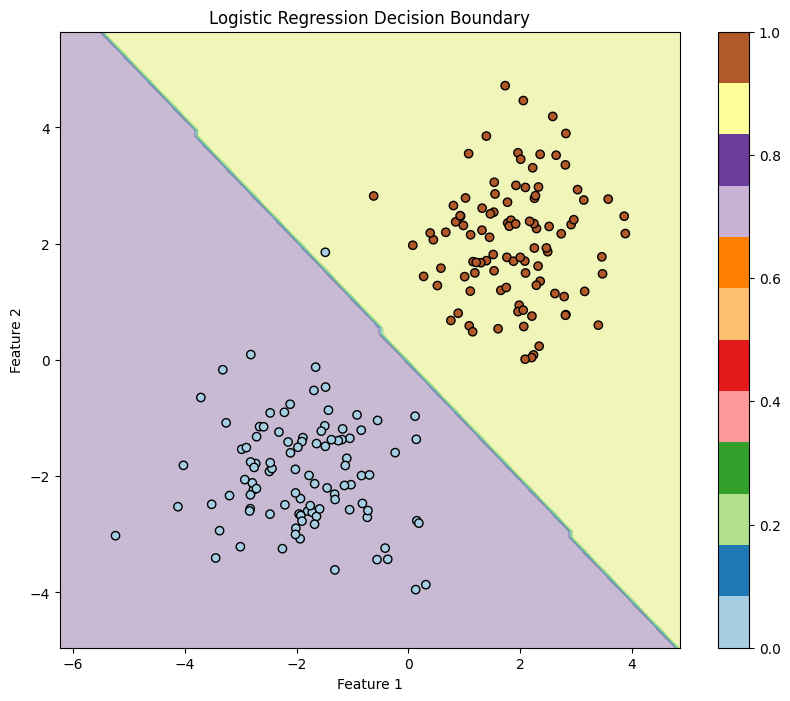

In [5]:
def plot_decision_boundary(X, y, model, scaler):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    mesh_points = np.c_[xx.ravel(), yy.ravel()]
    mesh_points_scaled = scaler.transform(mesh_points)
    Z = model.predict(mesh_points_scaled).reshape(xx.shape)
    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Logistic Regression Decision Boundary')
    plt.colorbar()
    plt.show()

# Call the function
plot_decision_boundary(X, y, model, scaler)

## ⚖️ Model Coefficients

In [6]:
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")

Coefficients: [[2.37763096 2.40814316]]
Intercept: [0.02685595]


## ✅ Summary
In this notebook, we:
- Generated synthetic data for binary classification
- Trained a logistic regression model
- Visualized the decision boundary
- Evaluated the model's performance

This serves as a clean and visual introduction to logistic regression with Scikit-learn.